In [ ]:
- make & save AverageTFRs
- GRandAverage
- Topomaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")
import local
from models.preprocessing import utils
import mne
mne.utils.set_log_level('error')

In [2]:
def time_vs_topo(tfr,freqs,ts,vmax=10,baseline=(-.2,0.),mode='mean',cmap='Spectral_r'):
    fig = plt.figure(figsize=(16,2))
    fig.suptitle('Time/Topomap for f='+str(freqs[0])+'-'+str(freqs[1])+'Hz',fontsize=16)
    axs = [plt.subplot2grid((1,len(ts)*5+1),(0,i*5),colspan=5) for i,t in enumerate(ts)]
    [tfr.plot_topomap(tmin=t[0],tmax=t[1],fmin=freqs[0],fmax=freqs[1],baseline=baseline,mode=mode,vmax=vmax,cmap='Spectral_r',colorbar=False,show=False,axes=axs[i]) for i,t in enumerate(ts)];
    [axs[i].set_xlabel('t= '+str(t[0])+'-'+str(t[1])+'s') for i,t in enumerate(ts)]
    plt.colorbar(axs[0].images[0],cax=plt.subplot2grid((1,len(ts)*5+1),(0,len(ts)*5)));
    plt.tight_layout()

In [3]:
d = "../../data/reinhartlab/multimodal/"
#d = "G:\\Frederik\\data\\reinhartlab\\multimodal\\"
ext_in = "visual-average.2to90-tfr.h5"
box = utils.select_dataset(d,ext_in); box

In [166]:
tfrs = [mne.time_frequency.read_tfrs(d+c+ext_in) for c in utils.get_selection(box)]
tfr_ga_vis = mne.grand_average([tf for tfr in tfrs for tf in tfr],interpolate_bads=True,drop_bads=True)

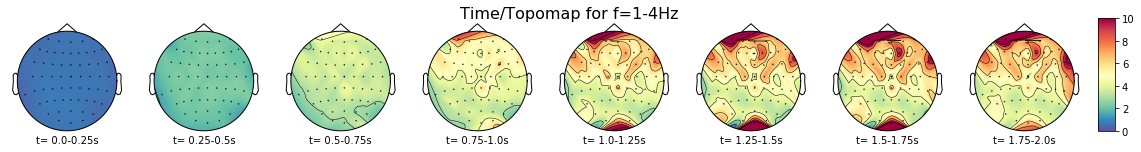

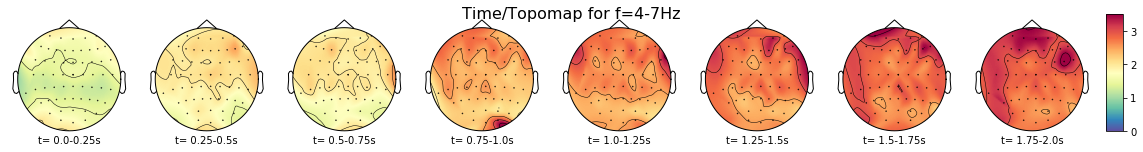

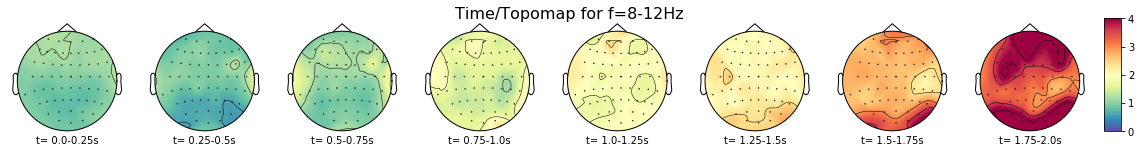

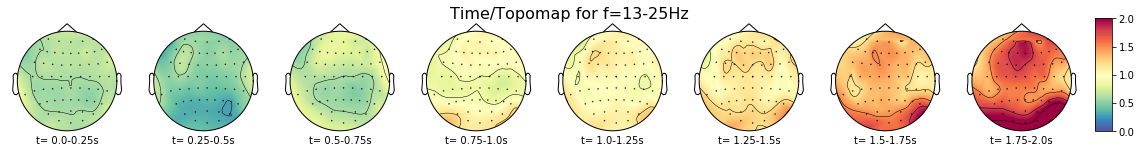

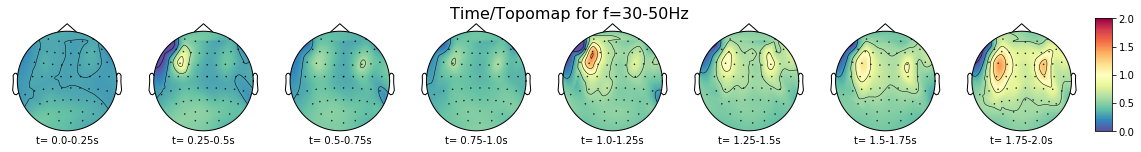

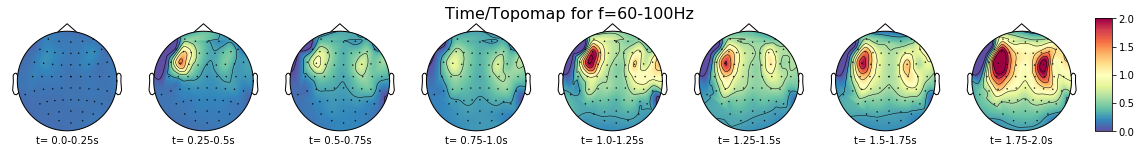

In [167]:
ts = [(0.,.25),(.25,.5),(.5,.75),(.75,1.),(1.,1.25),(1.25,1.5),(1.5,1.75),(1.75,2.)]
time_vs_topo(tfr_ga_vis,(1,4),ts,vmax=10)
time_vs_topo(tfr_ga_vis,(4,7),ts,vmax=3.5)
time_vs_topo(tfr_ga_vis,(8,12),ts,vmax=4)
time_vs_topo(tfr_ga_vis,(13,25),ts,vmax=2)
time_vs_topo(tfr_ga_vis,(30,50),ts,vmax=2)
time_vs_topo(tfr_ga_vis,(60,100),ts,vmax=2)

In [168]:
d = "../../data/reinhartlab/multimodal/"
#d = "G:\\Frederik\\data\\reinhartlab\\multimodal\\"
ext_in = "audio-average.2to90-tfr.h5"
box = utils.select_dataset(d,ext_in); box

In [170]:
tfrs = [mne.time_frequency.read_tfrs(d+c+ext_in) for c in utils.get_selection(box)]
tfr_ga_aud = mne.grand_average([tf for tfr in tfrs for tf in tfr],interpolate_bads=True,drop_bads=True)

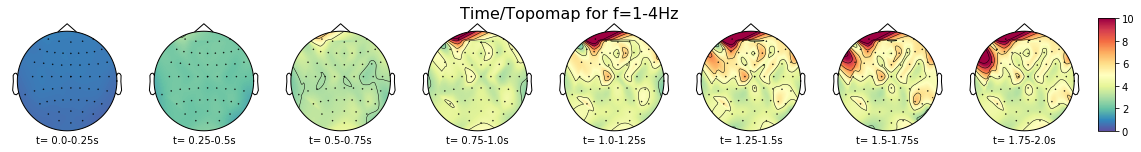

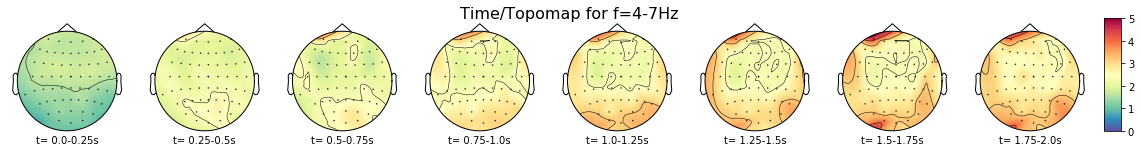

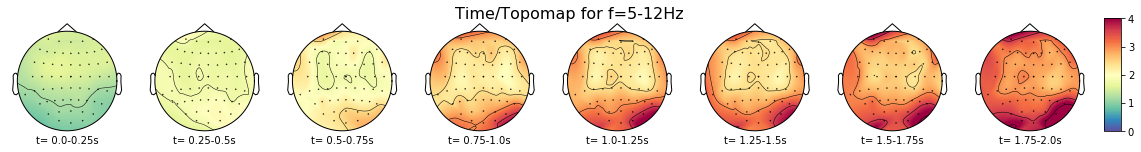

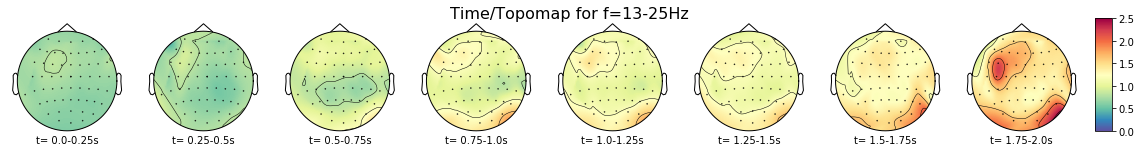

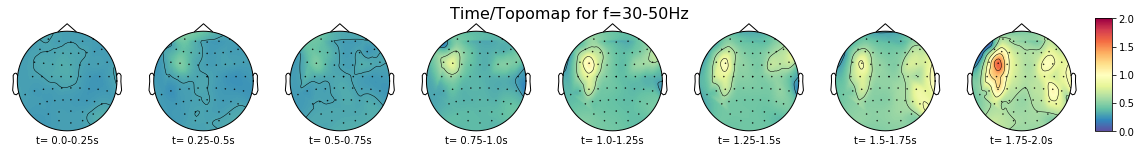

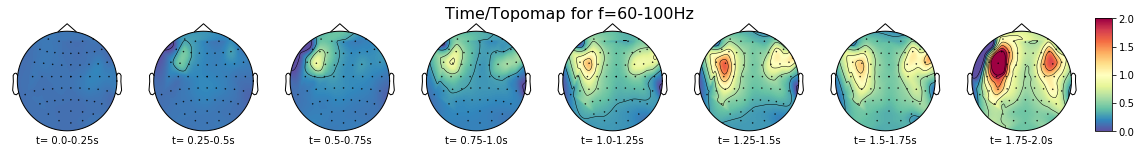

In [173]:
ts = [(0.,.25),(.25,.5),(.5,.75),(.75,1.),(1.,1.25),(1.25,1.5),(1.5,1.75),(1.75,2.)]
def time_vs_topo(tfr,freqs,ts,vmax=10,baseline=(-.2,0.),mode='mean',cmap='Spectral_r'):
    fig = plt.figure(figsize=(16,2))
    fig.suptitle('Time/Topomap for f='+str(freqs[0])+'-'+str(freqs[1])+'Hz',fontsize=16)
    axs = [plt.subplot2grid((1,len(ts)*5+1),(0,i*5),colspan=5) for i,t in enumerate(ts)]
    [tfr.plot_topomap(tmin=t[0],tmax=t[1],fmin=freqs[0],fmax=freqs[1],baseline=baseline,mode=mode,vmax=vmax,cmap='Spectral_r',colorbar=False,show=False,axes=axs[i]) for i,t in enumerate(ts)];
    [axs[i].set_xlabel('t= '+str(t[0])+'-'+str(t[1])+'s') for i,t in enumerate(ts)]
    plt.colorbar(axs[0].images[0],cax=plt.subplot2grid((1,len(ts)*5+1),(0,len(ts)*5)));
    plt.tight_layout()
time_vs_topo(tfr_ga_aud,(1,4),ts,vmax=10)
time_vs_topo(tfr_ga_aud,(4,7),ts,vmax=5)
time_vs_topo(tfr_ga_aud,(5,12),ts,vmax=4)
time_vs_topo(tfr_ga_aud,(13,25),ts,vmax=2.5)
time_vs_topo(tfr_ga_aud,(30,50),ts,vmax=2)
time_vs_topo(tfr_ga_aud,(60,100),ts,vmax=2)